Column names in the combined DataFrame:
Index(['TYLCV_control_Rep1', 'TYLCV_control_Rep2', 'TYLCV_control_Rep3',
       'TYLCV_infected_Rep1', 'TYLCV_infected_Rep2', 'TYLCV_infected_Rep3'],
      dtype='object')


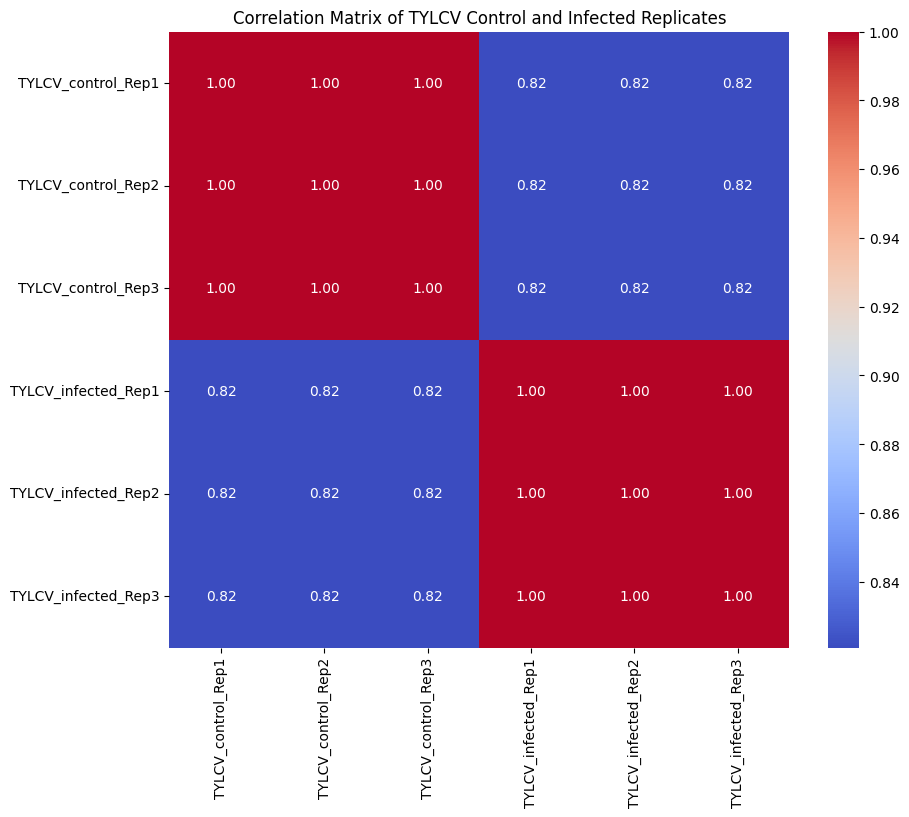

Descriptive Statistics for EB Control and Infected Replicates:
       TYLCV_control_Rep1  TYLCV_control_Rep2  TYLCV_control_Rep3  \
count        3.407900e+04        3.407900e+04        3.407900e+04   
mean         4.286145e+02        4.286145e+02        4.286145e+02   
std          2.425115e+04        2.425115e+04        2.425115e+04   
min          0.000000e+00        0.000000e+00        0.000000e+00   
25%          0.000000e+00        0.000000e+00        0.000000e+00   
50%          1.400000e+01        1.400000e+01        1.400000e+01   
75%          1.420000e+02        1.420000e+02        1.420000e+02   
max          4.390732e+06        4.390732e+06        4.390732e+06   

       TYLCV_infected_Rep1  TYLCV_infected_Rep2  TYLCV_infected_Rep3  
count         3.407900e+04         3.407900e+04         3.407900e+04  
mean          7.994996e+02         7.994996e+02         7.994996e+02  
std           1.390109e+04         1.390109e+04         1.390109e+04  
min           0.000000e+00     

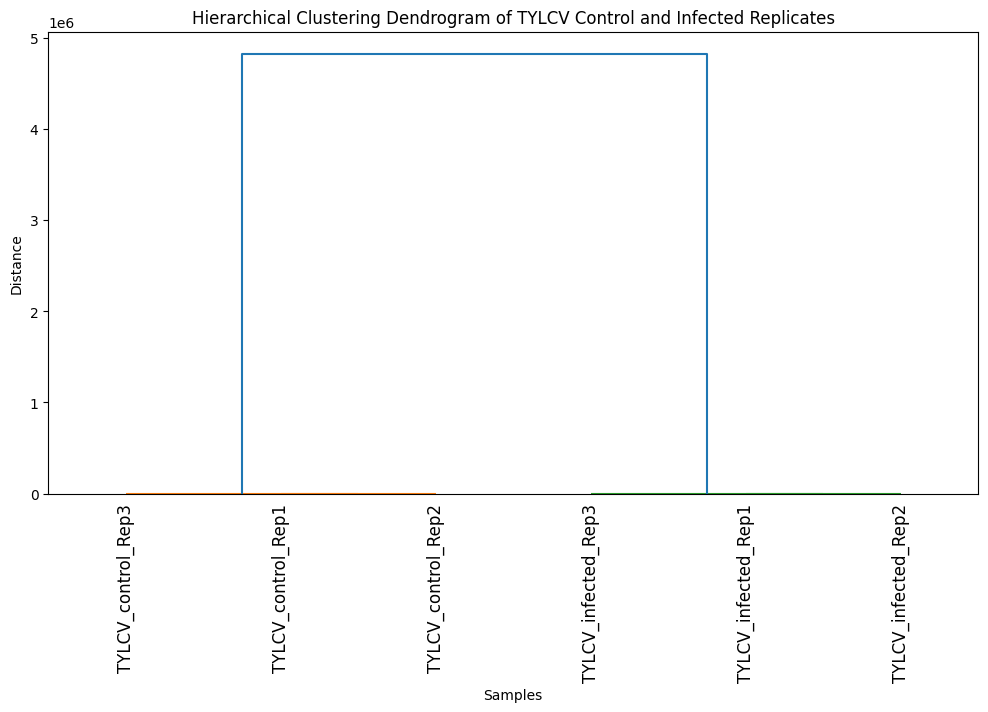

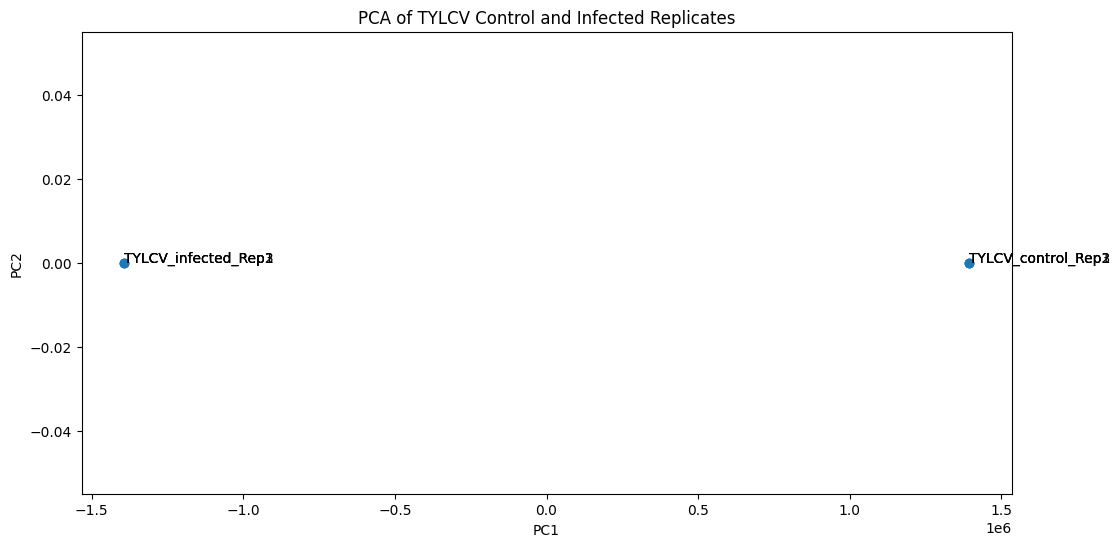

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# Function to read and concatenate count files
def read_count_files(file_paths):
    dataframes = []
    for file in file_paths:
        df = pd.read_csv(file, index_col=0)
        dataframes.append(df)
    combined_df = pd.concat(dataframes, axis=1)
    combined_df.fillna(0, inplace=True)  # Fill NaNs with zeros
    return combined_df

# Specify the paths to your EB control and infected count files
file_paths = [
    '/kaggle/input/tylcv-counts/TYLCV_control_Rep1.csv',
    '/kaggle/input/tylcv-counts/TYLCV_control_Rep2.csv',
    '/kaggle/input/tylcv-counts/TYLCV_control_Rep3.csv',
    '/kaggle/input/tylcv-counts/TYLCV_infected_Rep1.csv',
    '/kaggle/input/tylcv-counts/TYLCV_infected_Rep2.csv',
    '/kaggle/input/tylcv-counts/TYLCV_infected_Rep3.csv'
]

# Read and combine the count files
eb_combined_df = read_count_files(file_paths)

# Rename columns to reflect the source files
eb_combined_df.columns = [file.split('/')[-1].split('.')[0] for file in file_paths]

# Print the column names to verify
print("Column names in the combined DataFrame:")
print(eb_combined_df.columns)

# Calculate correlation matrix
correlation_matrix = eb_combined_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of TYLCV Control and Infected Replicates')
plt.savefig("correlation_matrix_TYLCV.png")
plt.show()

# Descriptive statistics for EB replicates (control and infected)
print("Descriptive Statistics for EB Control and Infected Replicates:")
print(eb_combined_df.describe())

# Hierarchical clustering on EB replicates
Z = linkage(eb_combined_df.T, 'ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=eb_combined_df.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram of TYLCV Control and Infected Replicates')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.savefig("Hierarchical_Clustering_TYLCV.png")
plt.show()

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eb_combined_df.T)

plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, sample in enumerate(eb_combined_df.columns):
    plt.annotate(sample, (pca_result[i, 0], pca_result[i, 1]))
plt.title('PCA of TYLCV Control and Infected Replicates')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("PCA of TYLCV.png")
plt.show()
